# NMFk: Nonnegative Matrix Factorization with k-means clustering

<div style="text-align: left; padding-top: 30px; padding-bottom: 30px;">
    <img src="https://raw.githubusercontent.com/SmartTensors/NMFk.jl/master/logo/nmfk-logo.png" alt="NMFk" width=20% max-width=125px;/>
</div>

**NMFk** is a code within the [SmartTensors](https://github.com/SmartTensors) framework for unsupervised, supervised and physics-informed (scientific) machine learning (ML) and artificial intelligence (AI) ([web](https:///SmartTensors.com) [source](https://github.com/SmartTensors)).

<div style="text-align: left; padding-top: 30px; padding-bottom: 30px;">
    <img src="https://raw.githubusercontent.com/SmartTensors/NMFk.jl/master/logo/SmartTensorsNewSmall.png" alt="NMFk" width=20% max-width=125px;/>
</div>

## Example Problem

Here is an example problem demonstrating how **NMFk** can be applied to solve a **blind source separation** problem.

The goal is to extract unknown signatures embedded (mixed) in unknown fashion in analyzed datasets.

**NMFk** also identifies how many are the unknown (hidden, latent) signatures.

**NMFk** also estimates the mixing ratios at each sensor.

The extracted signatures can be also unknown sources, signals or features depending on the analyzed dataset

This type of analysis is also called **feature extraction**.

In summary, **NMFk** automatically:
- identifies the number of the unknown mixed signatures in a dataset 
- estimates the shape of the unknown mixed signatures
- estimates how the signatures are mixed at each sensor

## NMFk installation

If **NMFk** is not installed, first execute in the Julia REPL: 

```julia
import Pkg
Pkg.add("NMFk")
Pkg.add("Mads")
```

## Importing NMFk in Julia

In [ ]:
import Pkg
Pkg.activate()
import NMFk
import Mads
import Gadfly
import Random

## Problem setup 

Let us generate 3 random signals:

In [2]:
Random.seed!(2021);

a = rand(15)
b = rand(15)
c = rand(15)
[a b c]

15×3 Matrix{Float64}:
 0.832634   0.035816    0.377985
 0.315059   0.1401      0.842449
 0.0243468  0.00638676  0.028982
 0.738091   0.527882    0.822962
 0.183181   0.381289    0.712903
 0.53822    0.417486    0.117822
 0.250121   0.659756    0.432229
 0.221218   0.690074    0.991475
 0.569192   0.607956    0.0800624
 0.720756   0.560347    0.390514
 0.236458   0.700165    0.781055
 0.596421   0.769456    0.695045
 0.19102    0.176081    0.861584
 0.730463   0.790929    0.467028
 0.351304   0.466695    0.25044

The singals look like this:

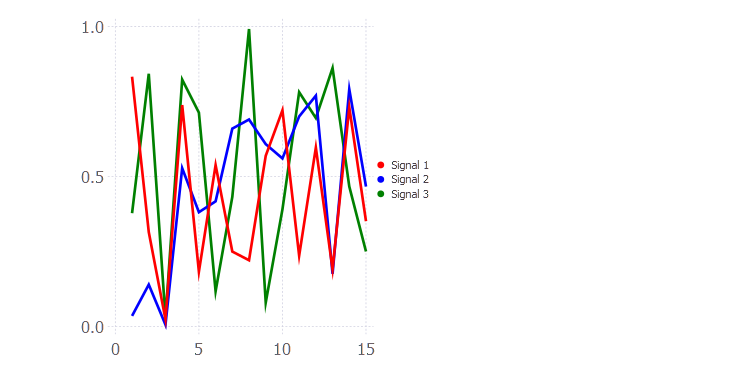

In [3]:
Mads.plotseries([a b c])

We can collect the 3 signal vectors into a signal matrix `W`:

In [ ]:
W = [a b c]

Now, we can mix the signals in matrix `W` to produce a data matrix `X` representing data collected at 5 sensors (e.g., measurement devices or montoring wells at different locations).

Each of the 5 sensors is observing some mixture of the signals in `W`.

The way the 3 signals are mixed at the sensors is represented by the mixing matrix `H`.

Let us define the mixing matrix `H` as:

In [ ]:
H = [1 10 0 0 1; 0 1 1 5 2; 3 0 0 1 5]

Each column of the `H` matrix defines how the 3 signals are represented in each sensors.

For example, the first sensor (`Column 1`) detects only `Signals 1 and 3`.
`Signal 2` is missing because `H[2,1]` is equal to zero.

The second sensor (`Column 2`) detects `Signals 1 and 2`.
`Signal 3` is missing because `H[3,2]` is equal to zero.

The third sensor (`Column 3`) detects `Signals 1 and 2`.
`Signal 3` is missing because `H[3,2]` is equal to zero.

The entries of `H` matrix also define the proportions at which the signals are mixed.

For example, the first sensor (column 1 above) detects `Signal 3` three times stronger than `Signal 1`.

The data matrix `X` is formed by multiplying `W` and `H` matrices. 

`X` defines the actual dataset observed at the 4 sensors.

In [ ]:
X = W * H

The data matrix `X` looks like this:

In [ ]:
Mads.plotseries(X; name="Sensors")

## NMFk analysis

Now, we can assume that we only know the data matrix `X`.

The `W` and `H` matrices are assumed to be unknown.
They will be estimated automatically (blindly) by **NMFk**.

**NMFk** analysis of the data matrix `X` will automatically:

- identify the number of the unknown mixed signals in `X` 
- estimate the shape of the unknown mixed signals (i.e., estimate the entries of `W` matrix)
- estimate how the signals are mixed at each sensors (i.e., estimate the entries of `H` matrix)

This can be done based only on the information in `X`:

In [ ]:
We, He, fitquality, robustness, aic, kopt = NMFk.execute(X, 2:5; save=false, method=:simple);

**NMFk** returns the estimated optimal number of signals `kopt` which in this case, as expected, is equal to 3.

The optimal number of signals is estimated using the following graph showing the quality (fit) and robustness of the soultion vs. number of signals:

In [ ]:
NMFk.plot_feature_selecton(2:5, fitquality, robustness)

**NMFk** also returns estimates of matrices `W` and `H`.

Here, the estimates of matrices W and H are stored as `We` and `He` objects.

`We[kopt]` and `He[kopt]` are scaled versions of the original `W` and `H` matrices:

In [ ]:
We[kopt]

In [ ]:
He[kopt]

The extracted signals are ordered by their expected importance.

The most dominant is the first signal, which is captured by `Column 1` of `We[kopt]` and Row 1 of `He[kopt]`.

The least dominant is the third (last) signal, which is captured by `Column 3` of `We[kopt]` and Row 3 of `He[kopt]`.

Note that the order of columns ('signals') in `W` and `We[kopt]` matrices are not expected to match.

In the same way, the order of rows ('sensors') in `H` and `He[kopt]` matrices are also not expected to match.

In general, the estimated order of 'signals' may be slightly different every time the code is executed due to randomness of the processes.

Below are plots providing comparisons between the original and estimated `W` an `H` matrices.


In [ ]:
Mads.plotseries(W; title="Original signals")

In [ ]:
Mads.plotseries(We[kopt] ./ maximum(We[kopt]; dims=1); title="Reconstructed signals")

In [ ]:
NMFk.plotmatrix(H ./ maximum(H; dims=2); title="Original mixing matrix")

In [ ]:
NMFk.plotmatrix(He[kopt] ./ maximum(He[kopt]; dims=2); title="Reconstructed mixing matrix")

## NMFk Pros
- Automatic identification of interpretable hidden (latent) data signals (signatures/features)
- Reduction of data dimensionality
- Detection of outlier, random and systematic noise
- Detection of data gaps
- Filling-in of data gaps
- Applicable to any dataset with nonnegative entries (if there are nonnegative entries they can removed through transformations)
- Applicable in a wide range problems: text mining, document clustering, making recommendations, visual pattern recognition, face recognition, gene expression analysis, feature extraction, source separation, etc. 

## NMFk Cons
- Computationally intensive
- Limited scaleability

## Math behind NMF

**NMF** factorizes (splits up) a non-negative input matrix ($\mathbf{X}$) into two smaller rank matrices $\mathbf{W}$ and $\mathbf{H}$.

To achieve this, **NMF** minimizes the following function:

$$
\Vert \mathbf{X} - \mathbf{W} \times \mathbf{H} \Vert_2
$$

**NMF** starts with either random or specified initialization of $\mathbf{W}$ and $\mathbf{H}$ matrices.

**NMF** estimates $\mathbf{W}$ and $\mathbf{H}$ that approximate $\mathbf{X}$.